# The Double Well

This notebook is dedicated to the numerical and analythical solutions of the well-known 1D double-square well quantum system. The starting point is the stationary Schrödinger equation:
$$
\hat{H}\Psi_n\left(x\right) = E_n \Psi_n\left(x\right),
$$
where $\hat{H}$ is the Hamiltonian of the system, that is built of the kinetic energy operator $\hat{T}$ and potential energy operator $\hat{V}$:
$$
\hat{H} = \hat{T} + \hat{V}.
$$
The kinetic energy operator for an electron ($m$ is its mass):
$$
\hat{T} = -\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2}.
$$
The potential energy operator is a multiplication with potential profile $V(x)$. The double-well system has the follwing form:
$$
V(x) = \left\{\begin{array}{lr}
        \infty, & x<-a\\
        0, & -a\leq x <-b\\
        V_0, & -b \leq x < b \\
        0, & b \leq x < a \\
        \infty,& x \geq a
        \end{array}\right.
$$
Finally, the eigenproblem is following:
$$
\left[-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2} + V\left(x\right)\right]\Psi_n\left(x\right) = E_n \Psi_n\left(x\right).
$$

In [10]:
#!pip install ipympl #Needed for Google Colaboratory
# Numpy module for numerical matrix computations
import numpy as np
# Module for the physical constants
import scipy.constants as const
# Plotting library
import matplotlib.pyplot as plt
#%matplotlib inline
#Some extra libraries for widget animations

import ipywidgets as widgets

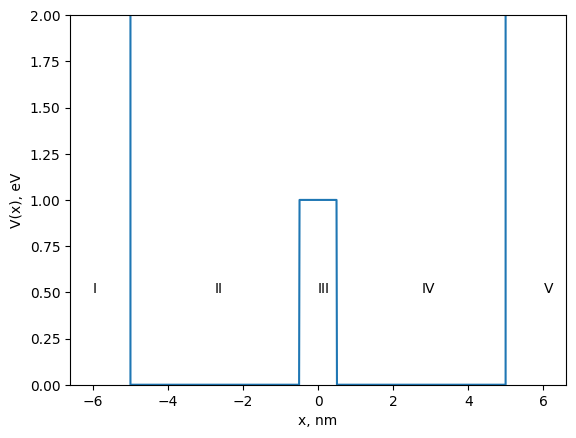

In [11]:
# Potential profile parameters:
# a [nm]
a_nm = 5
# b [nm]np.abs
b_nm = 0.5
# V0 [eV]
V0_eV = 1
# Converting the constants to SI:
a = a_nm*1e-9
b = b_nm*1e-9
V0 = V0_eV*const.e
V0_inf = 10000.0*const.e



# Potential profile:
def Vi(x):
  return np.where(x<-a,V0_inf,
                  np.where((x>=-a)&(x<-b),0,
                           np.where((x>=-b)&(x<b),V0,
                                    np.where((x>=b)&(x<a),0,V0_inf))))

#Number of points
N = 1001
# Creating the mesh of x points:
x = np.linspace(-1.2*a,1.2*a,N)
# Creating the potential profile V(x):
V = Vi(x)

# Plotting the potential profile:
fig1 = plt.figure()
ax1  = fig1.add_subplot(1,1,1)
ax1.plot(x*1e9,V/const.e)
ax1.set_ylim((0,2.0*V0/const.e))
ax1.set_xlabel("x, nm")
ax1.set_ylabel("V(x), eV")
ax1.text(-1.2*a*1e9,0.5,"I")
ax1.text(0.5*(-a-b)*1e9,0.5,"II")
ax1.text(0,0.5,"III")
ax1.text(0.5*(a+b)*1e9,0.5,"IV")
ax1.text(1.2*a*1e9,0.5,"V")

plt.show()

# Analytical solution

One can divide the $Ox$ axis to 5 regions with a different values of potential energy and then sew them together on a basis of the wavefunction properties.

## Areas $I$ and $V$

We assume that at this areas the potential energy of electron is infinite. Physically it means that the potential energy of the electron in these areas must be very high. Efficiently it means that an electron is absent in this area, therefore:
$$
\Psi_{I}(x) = \Psi_{V}(x) = 0.
$$

## Areas $II$ and $IV$

In these areas the equation has following form:
$$
-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2 \Psi(x)}{\mathrm{d}x^2} = E \Psi(x),
$$
the solution is
$$
\Psi_{II} (x)= A_1e^{-i\alpha x} + A_2e^{i\alpha x},
$$
$$
\Psi_{IV} (x)= C_1e^{-i\alpha x} + C_2e^{i\alpha x},
$$
where
$$
\alpha^2 =\frac{2mE}{\hbar^2}, \qquad \alpha>0.
$$

## Area $III$

Equation has following form:
$$
-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2 \Psi_{III}(x)}{\mathrm{d}x^2} + V_0 = E \Psi_{III}(x),
$$
the solution is
$$
\Psi_{III}(x) = B_1 e^{-\beta x} + B_2 e^{\beta x},
$$
where
$$
\beta^2 = \frac{2m(V_0 - E)}{\hbar^2}, \qquad \beta>0.  
$$

## Boundary Conditions

The wavefunction must be limited, continuous and smooth. Therefore, there are conditions on the borders of areas:
$$
\Psi_I(-a) = \Psi_{II}(-a), \\
\frac{\mathrm{d}\Psi_I}{\mathrm{d}x}(-a) = \frac{\mathrm{d}\Psi_{II}}{\mathrm{d}x}(-a), \\
\Psi_{II}(-b) = \Psi_{III}(-b), \\
\frac{\mathrm{d}\Psi_{II}}{\mathrm{d}x}(-b) = \frac{\mathrm{d}\Psi_{III}}{\mathrm{d}x}(-b), \\
\Psi_{III}(b) = \Psi_{IV}(b), \\
\frac{\mathrm{d}\Psi_{III}}{\mathrm{d}x}(b) = \frac{\mathrm{d}\Psi_{IV}}{\mathrm{d}x}(b), \\
\Psi_{IV}(a) = \Psi_{V}(a), \\
\frac{\mathrm{d}\Psi_{IV}}{\mathrm{d}x}(a) = \frac{\mathrm{d}\Psi_{V}}{\mathrm{d}x}(a). \\
$$
The primitive calculus allows one to substitute obtained solutions to these conditions and get the nonlinear equations that define the analythical solutions.

The Structural Equation:
$$
e^{i2\alpha(a-b)} = \frac{-(i\alpha - \beta)e^{\beta b} + \epsilon(i\alpha - \beta)e^{-\beta b}}{(i\alpha + \beta)e^{\beta b} + \epsilon(i\alpha - \beta)e^{-\beta b}},
$$
where $\epsilon$ is the coefficient that defines if the wavefunction is even ($\epsilon = 1$) or odd ($\epsilon = -1$).

The Radial Equation:
$$
(\alpha^2 + \beta^2) = \frac{V_02m}{\hbar^2}.
$$

Solving these equations allow one to reconstruct both eigenvalues and eigenfunctions of the double-well system. As one can see, even this simple example leads to a very comlpex system of non-linear equations. However, there is more universal numerical way to reconstruct the wavefunctions.

# Numerical 1D solver

Starting from the same 1D Schrodinger equation:
$$
\left[-\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2} + V\left(x\right)\right]\Psi\left(x\right) = E \Psi\left(x\right).
$$
wihh the similar piecewise potential:
$$
V(x) = \left\{\begin{array}{lr}
        V_\infty, & x<-a\\
        0, & -a\leq x <-b\\
        V_0, & -b \leq x < b \\
        0, & b \leq x < a \\
        V_\infty,& x \geq a
        \end{array}\right.
$$

If we assume that there is no wavefunction outside the $x\in\left[-a,a\right]$, then we can define the following boundary conditions:
$$
\left\{\begin{array}{lr}
  \Psi(-a) =& 0,\\
  \Psi(a) =& 0.
  \end{array}
\right.
$$
The $\left[-a,a\right]$ region is splitted with step $h$:
$$
\left\{-a, -a+h, -a+2h, \dots, a-2h, a-h, a \right\}.
$$
Here we assume that we have $N$ points.

The derivative $\frac{\mathrm{d^2}\Psi}{\mathrm{d}x^2}$ has the following discrete form:
$$
\frac{\mathrm{d^2}\Psi(x_j)}{\mathrm{d}x^2} = \frac{\Psi_{j-1}-2\Psi_j+\Psi_{j+1}}{h^2}
$$
Then for any point from $j=1$ to $j=N-1$ one can write the equation:
$$
-\frac{\hbar^2}{2mh^2} \left( \Psi_{j-1}-2\Psi_j+\Psi_{j+1} \right) + V_j \Psi_j = E\Psi_j,
$$
That is in fact the system of linear equations, rewritable in matrix form:
$$
\left[ \begin{matrix}
\left(\frac{\hbar^2}{mh^2} + V_2\right) & -\frac{\hbar^2}{2mh^2} & 0 & \cdots & 0 \\
-\frac{\hbar^2}{2mh^2} & \left(\frac{\hbar^2}{mh^2} + V_3\right) & -\frac{\hbar^2}{2mh^2} & \cdots & 0 \\
0&-\frac{\hbar^2}{2mh^2} & \left(\frac{\hbar^2}{mh^2} + V_4\right) & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \left(\frac{\hbar^2}{mh^2} + V_{N-1}\right)
\end{matrix} \right]
\left[ \begin{matrix}
\Psi_2 \\
\Psi_3 \\
\Psi_4 \\
\vdots \\
\Psi_{N-1}
\end{matrix}
\right] = E \left[ \begin{matrix}
\Psi_2 \\
\Psi_3 \\
\Psi_4 \\
\vdots \\
\Psi_{N-1}
\end{matrix}
\right].
$$

In fact, this mean that instead of the eigenproblem with differential operators we should solve the eigenproblem for the matrix that is relatively simple.

In [12]:
# Building the matrix:
M = np.zeros((N-2,N-2))
for i in range(N-2):
  M[i][i] = const.hbar**2/(const.m_e*(x[1]-x[0])**2) + V[i+1]
  if(i!=0):
    M[i][i-1] = -const.hbar**2/(2.0*const.m_e*(x[1]-x[0])**2)
  if(i!=N-3):
    M[i][i+1] = -const.hbar**2/(2.0*const.m_e*(x[1]-x[0])**2)

# Obtaining the eigenvalues and eigenvectors:
from numpy.linalg import eig
eval, evec = eig(M)
# Transposing the evec matrix (because eigenfunctions are columns by default)
evec = np.transpose(evec)
# Sorting Eigenvalues and Eigenvectors:
idx = eval.argsort()
eval = eval[idx]
evec = evec[idx] #Still a valid eigenvector if need to multiply by minus 1


Text(0, 0.5, '$E$, eV')

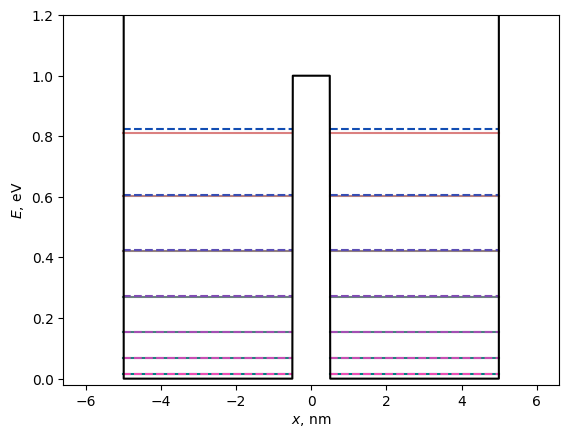

In [13]:
# Drawing the energy levels:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.set_ylim((-0.02,1.2*V0/const.e))

# Number of states
Nst=14

for i in range(Nst):
  if (i%2==0):
    ax2.plot(np.array([-a,-b])*1e9,np.array([eval[i],eval[i]])/const.e, color = (i/Nst,0.5,0.5))
    ax2.plot(np.array([b,a])*1e9,np.array([eval[i],eval[i]])/const.e, color = (i/Nst,0.5,0.5))
  else:
    ax2.plot(np.array([-a,-b])*1e9,np.array([eval[i],eval[i]])/const.e, "--", color = (1-i/Nst,0.3,0.7))
    ax2.plot(np.array([b,a])*1e9,np.array([eval[i],eval[i]])/const.e, "--", color = (1-i/Nst,0.3,0.7))
ax2.plot(x*1e9,V/const.e,"k")
ax2.set_xlabel("$x$, nm")
ax2.set_ylabel("$E$, eV")


In [14]:
#To print the energies you can find them in the eval array

#First eigenenergy converted to electronvolts
eval[0]/const.e

#Second eigenenergy converted to electronvolts
eval[1]/const.e

0.017024695720272865

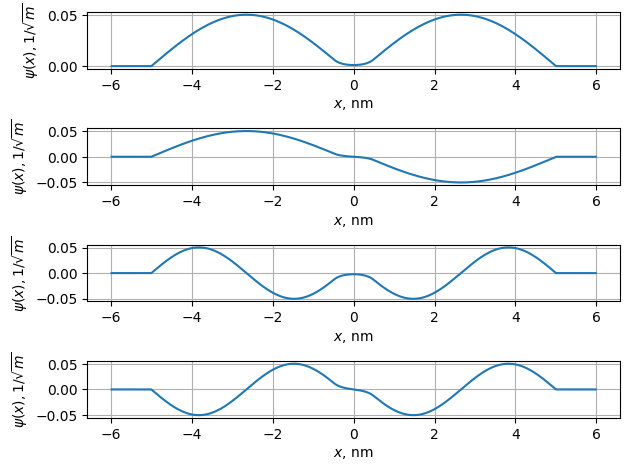

In [15]:
#Plot the first 4 eigenfunctions (these are the wavefunctions)
fig3 = plt.figure()

for i in range(4):
  ax3 = fig3.add_subplot(4,1,i+1)
  ax3.plot(x[1:N-1]*1e9, evec[i])
  ax3.set_xlabel("$x$, nm")
  ax3.set_ylabel("$\\psi(x), 1/\\sqrt{m}$")
  ax3.grid()
fig3.tight_layout()

# Questions and practical tasks

* Are the eigenfunctions normalised?

In [16]:
# Check that the inner product of an eigenfunction with itself is 1
print(np.inner(np.conj(evec[0]), evec[0]))

# Check that the inner product of an eigenfunction with a different eigenfunction is 0
print(np.inner(np.conj(evec[0]), evec[1]))

1.0
6.376734362287578e-10


*	Let's create a superposition of the solution wavefunctions
*	Where can you use these wavefunctions in terms of quantum computing?

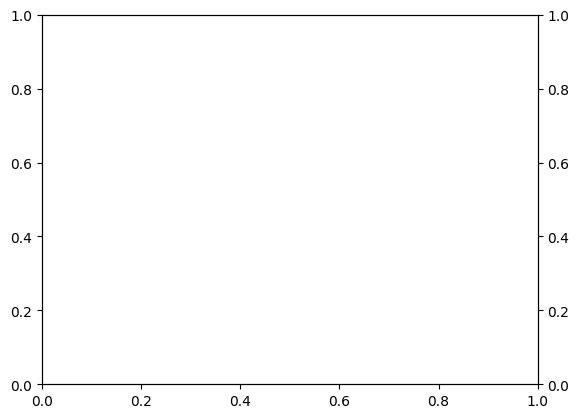

In [17]:
#Superposition of the first two eigenfunctions
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax41 = ax4.twinx()

fig4.canvas.toolbar_visible = True
fig4.canvas.header_visible = False
fig4.canvas.footer_visible = False

#plt.plot(x[1:N-1]*1e9, evec[i])

@widgets.interact(theta=(0, np.pi, np.pi/1000), gamma=(0, 2*np.pi, np.pi/1000))
def update1(theta=0, gamma=0):
    """Remove old lines from plot and plot new one"""
    ax4.clear()
    alpha = np.cos(theta/2)
    beta  = np.exp(1j*gamma)*np.sin(theta/2)
    state = alpha*evec[0] + beta*evec[1]
    prob_0 = np.abs(alpha)**2
    prob_1 = np.abs(beta)**2
    fig4.suptitle("{:.2f}".format(alpha) + r"$\left|0\right\rangle$" + " + " + "({:.2f})".format(beta) + r"$\left|1\right\rangle$" + "\n P(0) = {:.2f}".format(prob_0) + " P(1) = {:.2f}".format(prob_1), y = 0.98)
    ax4.plot(x[1:N-1]*1e9, np.abs(state)**2)
    ax41.plot(x*1e9,V/const.e,"k")
    ax41.set_ylabel("$E$, eV")
    ax41.set_ylim((0,2.0*V0/const.e))
    ax4.set_ylim((0,0.006))
    ax4.set_xlabel("$x$, nm")
    ax4.set_ylabel(r"$|\psi(x)|^2, \frac{1}{m}$")
    ax4.grid()
    print ("Energy 1", eval[0]/const.e)
    print ("Energy 2", eval[1]/const.e)

* What does time evolution look like if we start with an eigenstate?

$$|\psi\rangle = \alpha|0\rangle e^{\frac{-iE_{0}t}{\hbar}} + \beta|1\rangle e^{\frac{-iE_{1}t}{\hbar}}$$

interactive(children=(FloatSlider(value=0.0, description='time', max=1.0, step=0.01), Output()), _dom_classes=…

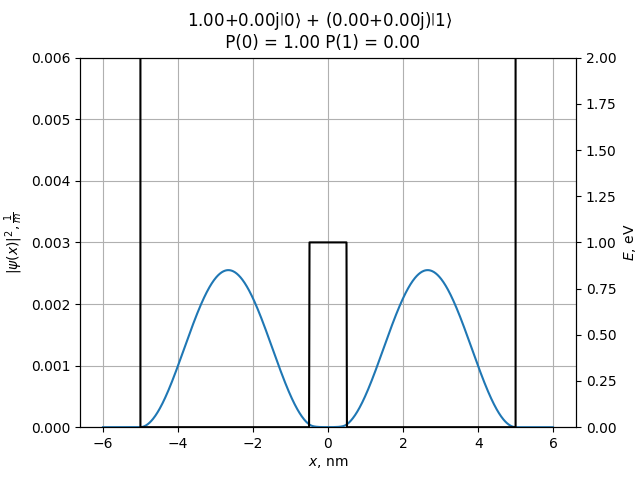

In [ ]:
#Start with initial state as first eigenfunction
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax51 = ax5.twinx()

fig5.canvas.toolbar_visible = True
fig5.canvas.header_visible = False
fig5.canvas.footer_visible = False

@widgets.interact(time=widgets.FloatSlider(min=0, max=1, value=0, step=1e-2, valfmt="{:.2f}"))
def update1(time=0):
    """Remove old lines from plot and plot new one"""
    ax5.clear()
    alpha = 1
    beta  = 0
    alpha_time = alpha*np.exp(-1j*eval[0]*time/const.hbar)
    beta_time  = beta*np.exp(-1j*eval[1]*time/const.hbar)
    state = alpha_time*evec[0] + beta_time*evec[1]
    prob_0 = np.abs(alpha_time)**2
    prob_1 = np.abs(beta_time)**2
    fig5.suptitle("{:.2f}".format(alpha_time) + r"$\left|0\right\rangle$" + " + " + "({:.2f})".format(beta_time) + r"$\left|1\right\rangle$" + "\n P(0) = {:.2f}".format(prob_0) + " P(1) = {:.2f}".format(prob_1), y = 0.98)
    ax5.plot(x[1:N-1]*1e9, np.abs(state)**2)
    ax51.plot(x*1e9,V/const.e,"k")
    ax51.set_ylabel("$E$, eV")
    ax51.set_ylim((0,2.0*V0/const.e))
    ax5.set_ylim((0,0.006))
    ax5.set_xlabel("$x$, nm")
    ax5.set_ylabel(r"$|\psi(x)|^2, \frac{1}{m}$")
    ax5.grid()

* What about when we start in an equal superposition of eigenstates?

$$|\psi\rangle = \alpha|0\rangle e^{\frac{-iE_{0}t}{\hbar}} + \beta|1\rangle e^{\frac{-iE_{1}t}{\hbar}}$$

interactive(children=(FloatSlider(value=0.0, description='time', max=1.0, step=0.01), Output()), _dom_classes=…

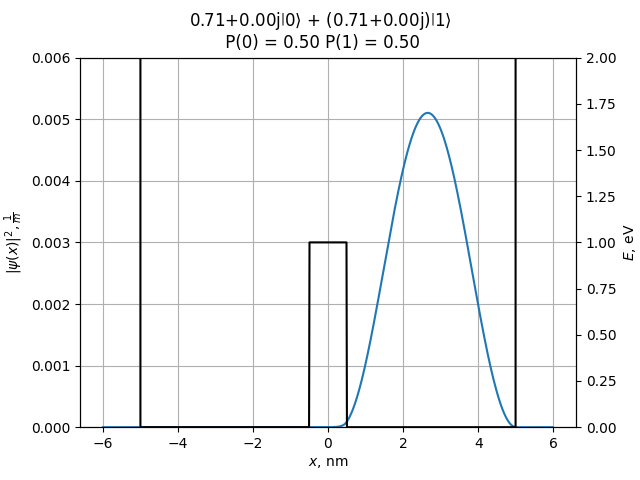

In [ ]:
#Start with an equal superposition of eigenstates
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax61 = ax6.twinx()

fig6.canvas.toolbar_visible = True
fig6.canvas.header_visible = False
fig6.canvas.footer_visible = False

@widgets.interact(time=widgets.FloatSlider(min=0, max=1, value=0, step=1e-2, valfmt="{:.2f}"))
def update1(time=0):
    """Remove old lines from plot and plot new one"""
    ax6.clear()
    alpha = 1/np.sqrt(2)
    beta  = 1/np.sqrt(2)
    alpha_time = alpha*np.exp(-1j*eval[0]*time/const.hbar)
    beta_time  = beta*np.exp(-1j*eval[1]*time/const.hbar)
    state = alpha_time*evec[0] + beta_time*evec[1]
    prob_0 = np.abs(alpha_time)**2
    prob_1 = np.abs(beta_time)**2
    fig6.suptitle("{:.2f}".format(alpha_time) + r"$\left|0\right\rangle$" + " + " + "({:.2f})".format(beta_time) + r"$\left|1\right\rangle$" + "\n P(0) = {:.2f}".format(prob_0) + " P(1) = {:.2f}".format(prob_1), y = 0.98)
    ax6.plot(x[1:N-1]*1e9, np.abs(state)**2)
    ax61.plot(x*1e9,V/const.e,"k")
    ax61.set_ylabel("$E$, eV")
    ax61.set_ylim((0,2.0*V0/const.e))
    ax6.set_ylim((0,0.006))
    ax6.set_xlabel("$x$, nm")
    ax6.set_ylabel(r"$|\psi(x)|^2, \frac{1}{m}$")
    ax6.grid()